<a href="https://colab.research.google.com/github/s2ul2/programmers_codingtest/blob/main/%EA%B7%B8%EB%9E%98%ED%94%84_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 서로소 집합
* 뜻 : 공통 원소가 없는 두 집합을 의미.

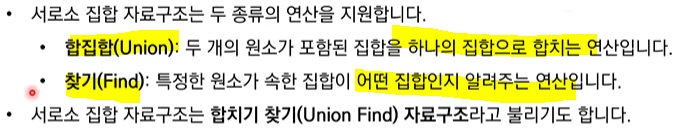

* 과정

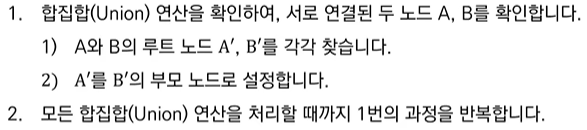

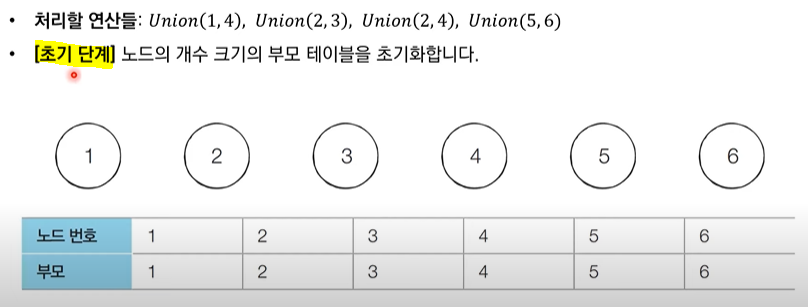

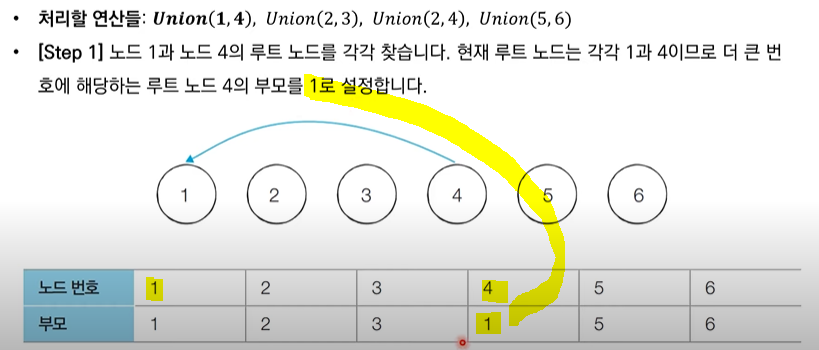

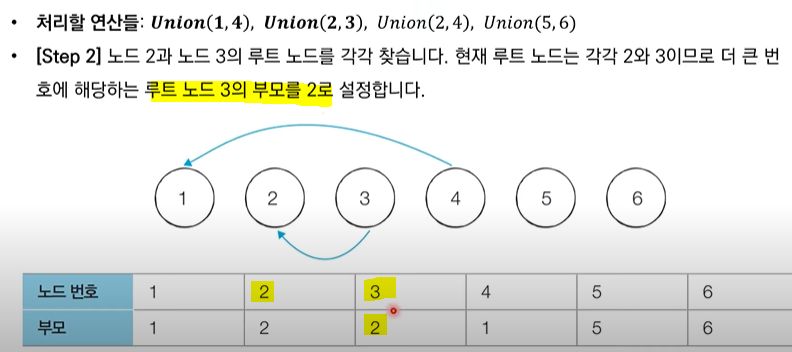

* 결과

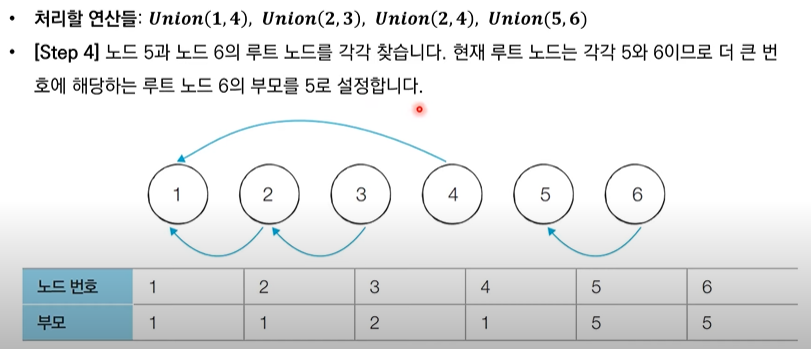

* 연결성

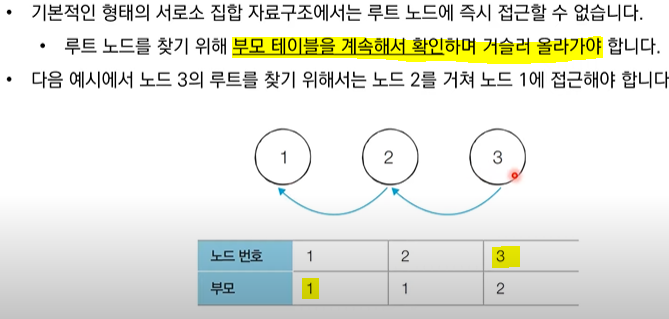

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a) # a노드의 루트노드 찾기 -> a
    b = find_parent(parent, b) # b노드의 루트노드 찾기 -> b
    if a < b:  
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

# Union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력하기
print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력하기
print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

* 개선된 방법

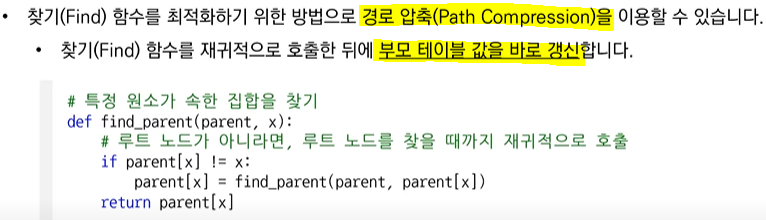

* 개선된 방법 장점

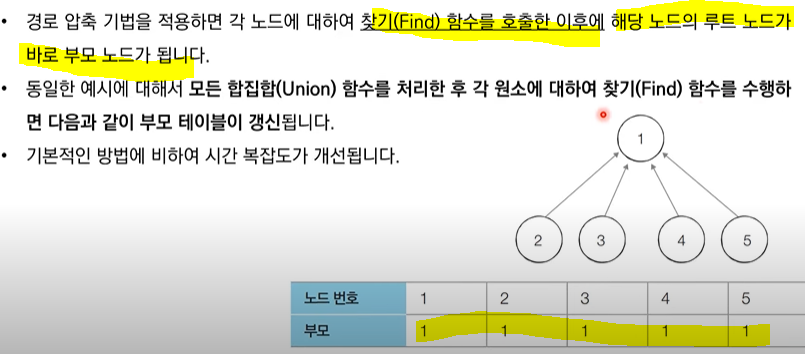

## 서로소 집합을 이용한 사이클 판별

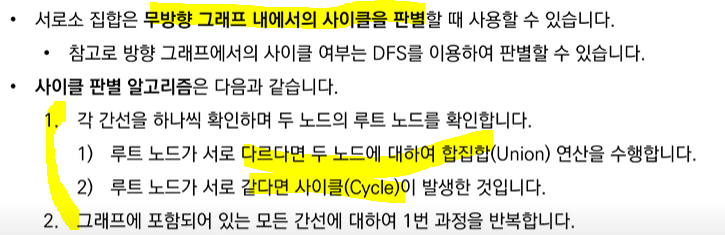

* 과정

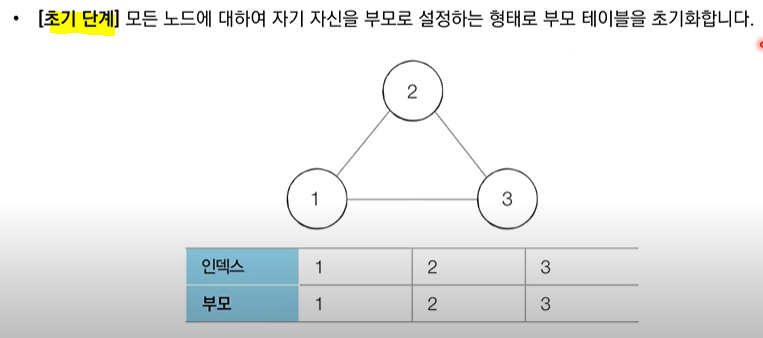

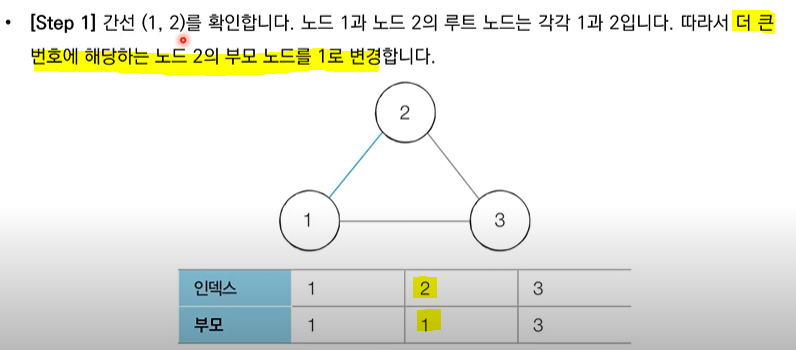

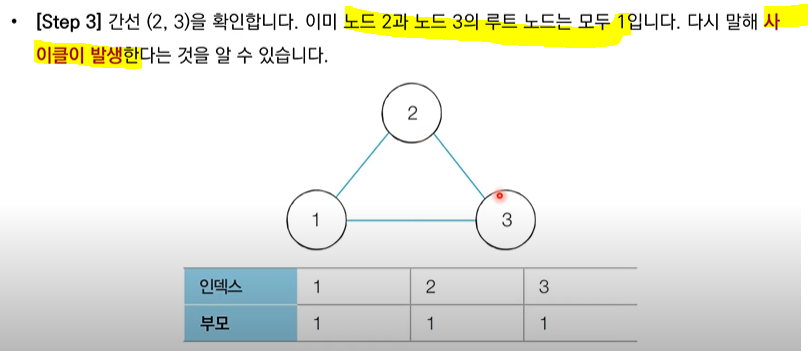

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

cycle = False # 사이클 발생 여부

for i in range(e):
    a, b = map(int, input().split())
    # 사이클이 발생한 경우 종료
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    # 사이클이 발생하지 않았다면 합집합(Union) 연산 수행
    else:
        union_parent(parent, a, b)

if cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")

## 신장트리
- 그래프 내 모든 노드를 포함하는 트리
- 사이클이 없어야함.
- n개의 노드를 지닌 신장 트리는 n-1개의 간선을 지님.
- 통신망, 도로망 같이 최소의 링크를 사용하는 네트워크 구축 시 사용

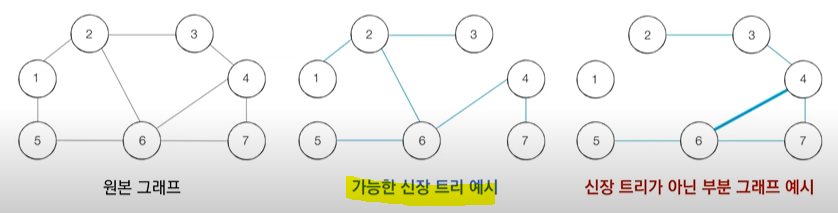

## 최소 신장 트리
- 모든 노드들을 가장 적은 수의 간선과 비용으로 연결
- 알고리즘 : 크루스칼

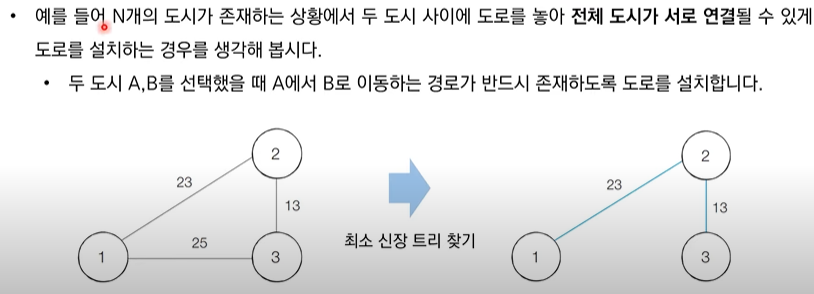

### 크루스칼

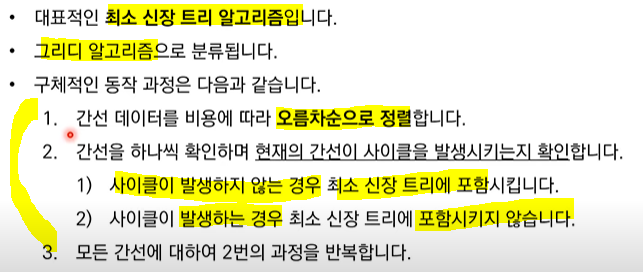

* 과정

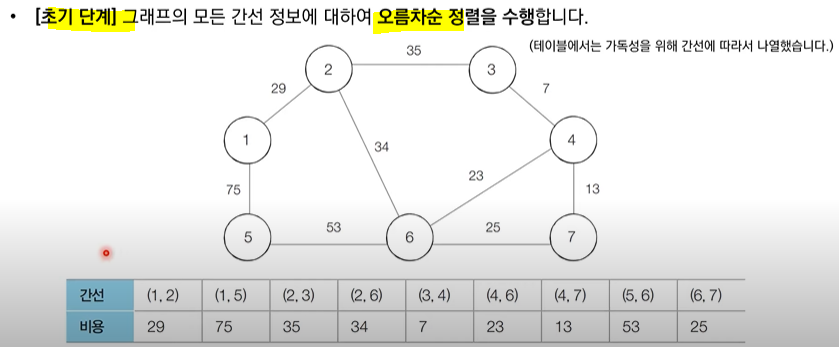

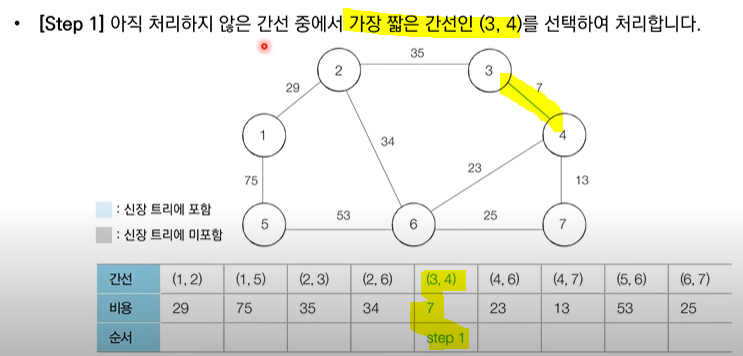

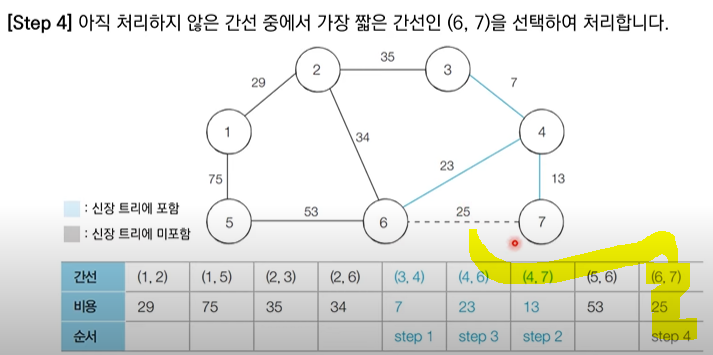

간선 (6, 7)은 사이클을 형성하므로 신장트리에 포함하지 않는다. (회색선)

 사이클 형성 확인법 : union-find 알고리즘

 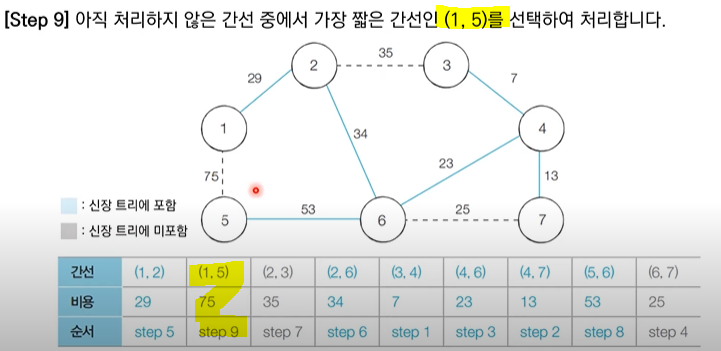

* 결과

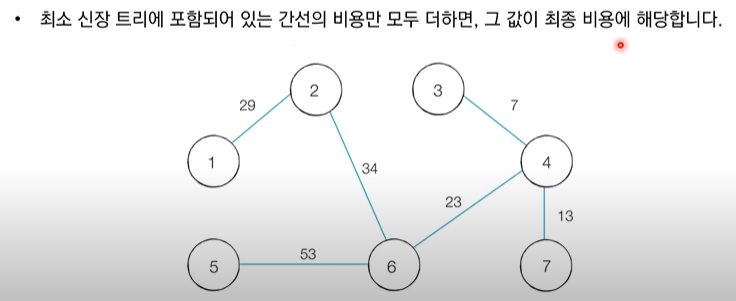

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))

# 간선을 비용순으로 정렬
edges.sort()

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 신장트리집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost

print(result)

## 위상정렬
* 사이클이 없는 방향 그래프의 모든 노드를 방샹성에 거스르지 않도록 순서대로 나열하는 것

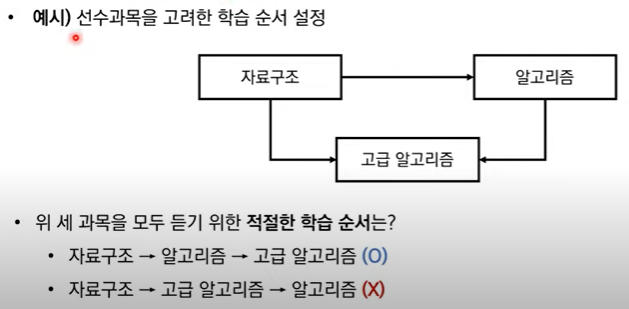

* 진입차수와 진출차수

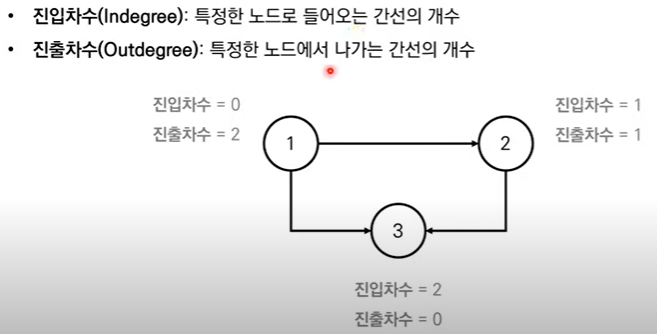

* 과정

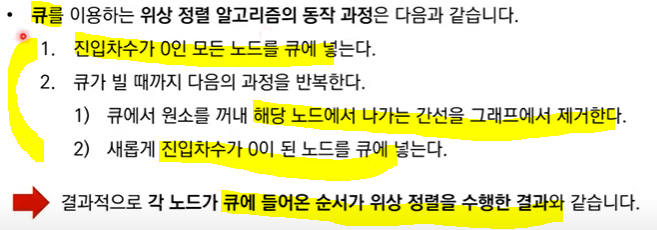

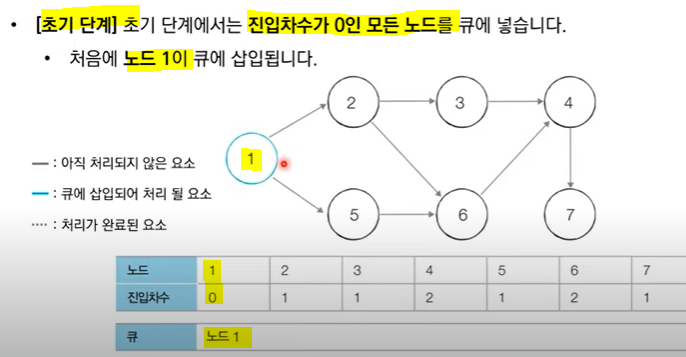

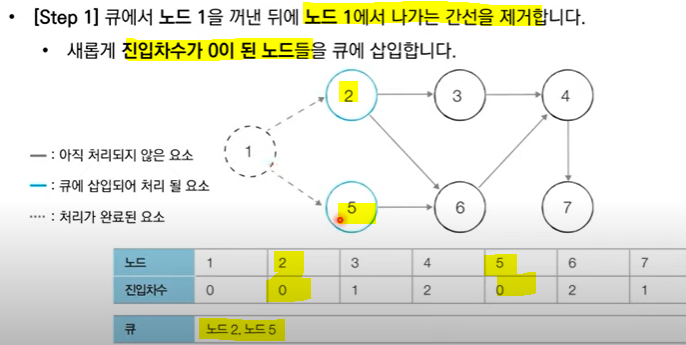

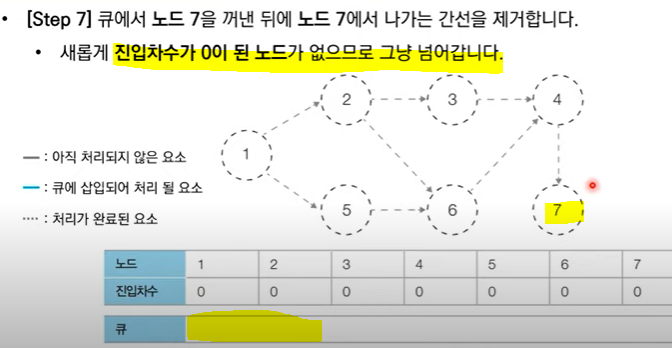

* 결과

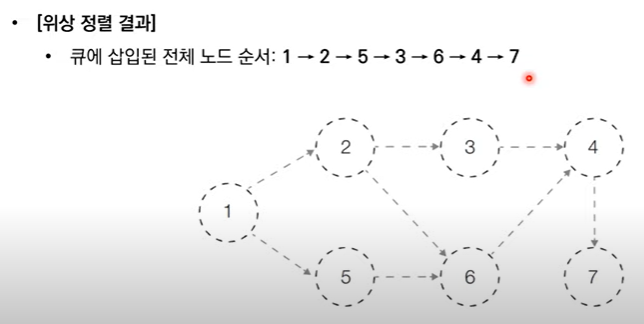

In [ ]:
from collections import deque

# 노드의 개수와 간선의 개수를 입력 받기
v, e = map(int, input().split())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v + 1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트 초기화
graph = [[] for i in range(v + 1)]

# 방향 그래프의 모든 간선 정보를 입력 받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입 차수를 1 증가
    indegree[b] += 1

# 위상 정렬 함수
def topology_sort():
    result = [] # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬을 수행한 결과 출력
    for i in result:
        print(i, end=' ')

topology_sort()

## 팀 결성 : 약간의 실수, 아직 익숙하지 않음 (14분)

In [3]:
n, m = map(int, input().split())
parent = [0] * (n+1)
# parent 초기화
for i in range(1, n+1):
    parent[i] = i

def find_root(parent, x):
    if parent[x] != x:
        parent[x] = find_root(parent, parent[x])
    return parent[x]

def union_a_b(parent, a, b):
    a = find_root(parent, a)
    b = find_root(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] =b

for i in range(m):
    c, a, b = map(int, input().split())
    if c == 0: # union
        union_a_b(parent, a, b)
    elif c == 1: # find
        a_parent = find_root(parent, a)
        b_parent = find_root(parent, b)
        if a_parent == b_parent:
            print('YES')
        else:
            print('NO')


7 8
0 1 3
1 1 7
NO
0 7 6
1 7 1
NO
0 3 7
0 4 2
0 1 1
1 1 1
YES


## 도시 분할 계획 : 해결 X
* 어떻게 두개의 최소신장트리를 만들지?

In [5]:
n, m = map(int, input().split())
# 최소 신장 트리 구하기 : 크루스칼
parent = []
# parent 초기화
for i in range(n+1):
    parent.append(i)

def find_root(parent, x):
    if parent[x] != x:
        parent[x] = find_root(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    if find_root(parent, a) < find_root(parent, b):
        parent[b] = a
    else:
        parent[a] = b


edges = []
for i in range(m):
    a, b, c = map(int, input().split()) # a->b 유지비 : c
    edges.append((c, a, b))
edges.sort()

result = 0
for edge in edges:
    c, a,b = edge
    if find_root(parent, a) != find_root(parent, b):
        union_parent(parent, a, b)
        result += c
        print(result)

result

7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
1
2
4
6
8
11
14
18


18

In [17]:
# 책보고 다시 풂
n, m = map(int, input().split())
# 최소 신장 트리 구하기 : 크루스칼
parent = [0] * (n+1)
# parent 초기화
for i in range(1, n + 1):
    parent[i] = i

def find_root(parent, x):
    if parent[x] != x:
        parent[x] = find_root(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_root(parent, a)
    b = find_root(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b


edges = []
for i in range(m):
    a, b, c = map(int, input().split()) # a->b 유지비 : c
    edges.append((c, a, b))
edges.sort()

result = []
for edge in edges:
    c, a,b = edge
    print(c, a, b)
    if find_root(parent, a) != find_root(parent, b):
        union_parent(parent, a, b)
        result.append(c)
        print(result)

sum(result) - max(result)

7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
1 3 2
[1]
1 6 4
[1, 1]
2 1 3
[1, 1, 2]
2 1 6
[1, 1, 2, 2]
2 2 5
[1, 1, 2, 2, 2]
3 1 2
3 4 5
3 6 5
4 3 4
4 6 7
[1, 1, 2, 2, 2, 4]
5 5 1
6 7 3


8

* union_parent 함수 구하는거 틀림 ㅜㅜㅜㅜ 
* union_parent 함수에서 a와 b의 루트노드 찾고 이 루트노드를 바꿔줘야하는것임!!!

In [14]:
# 올바른 코드
def union_parent(parent, a, b):
    a = find_root(parent, a)
    b = find_root(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

[0, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# 잘못된 코드 (내가 틀린 부분)
def union_parent(parent, a, b):
    if find_root(parent, a) < find_root(parent, b):
        parent[b] = a
    else:
        parent[a] = b

## 커리큘럼 : 틀림



In [21]:
n = int(input())

time_lst = [0] * (n+1) # 각 강의들의 시간을 담는 리스트
graph = [[] for i in range(n+1)] # 선수과목을 담는 리스트
indegree = [0] * (n+1) # 진입노드 개수를 담는 리스트

for i in range(1, n+1): # i번째 강의
    input_lst = list(map(int, input().split()))
    time_lst[i] = input_lst[0] # 강의 시간
    j = 1
    while input_lst[j] != -1:
        graph[input_lst[j]].append(i)  # i번째 강의의 선수과목은 input_lst[j]강의이다. -->즉  input_lst[j]강의를 들으면 i번째 강의를 들을 수 있다.
        indegree[i] += 1
        j += 1
print(time_lst)
print(indegree)
print(graph)

# 위상정렬
from collections import deque
result = []
q = deque()

# indegree가 0인 강의 q에 넣기
for course in range(1, len(indegree)):
    if indegree[course] == 0:
        q.append(course)

while q:
    now = q.popleft()
    result.append(now)
    for after in graph[now]: # 선수과목 now를 수강한 이후 들을 수 있는 강의들
        indegree[after] -= 1 # 선수과목 하나를 들었으므로 진입과목 개수는 하나 줄어듦
        if indegree[after] == 0:
            q.append(after)
result

# 1의 선수과목 : X
# 2의 선수과목 : 1
# 3의 선수과목 : 1
# 4의 선수과목 : 3, 1
# 5의 선수과목 : 3
# 1 -> 2
#   -> 3 -> 4
#       -> 5

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
[0, 10, 10, 4, 4, 3]
[0, 0, 1, 1, 2, 1]
[[], [2, 3, 4], [], [4, 5], [], []]


[1, 2, 3, 4, 5]

### 책풀이
* 각 강의에 대하여 인접한 강의를 확인할 때, 인접한 강의에 대하여 현재보다 강의 시간이 더 긴 경우를 찾는다면 -> 더 오랜 시간이 걸리는 경우의 시간 값을 저장하는 방식
* 따라서 위상 정렬을 수행하면서 매번 간선 정보를 확인한다.
* 최종적으로 각 강의를 수강하기까지의 최소 시간을 result 리스트에 담는다.

In [ ]:
from collections import deque
import copy

# 노드의 개수 입력받기
v = int(input())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v + 1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for i in range(v + 1)]
# 각 강의 시간을 0으로 초기화
time = [0] * (v + 1)

# 방향 그래프의 모든 간선 정보를 입력받기
for i in range(1, v + 1):
    data = list(map(int, input().split()))
    time[i] = data[0] # 첫 번째 수는 시간 정보를 담고 있음
    for x in data[1:-1]:
        indegree[i] += 1
        graph[x].append(i)

# 위상 정렬 함수
def topology_sort():
    result = copy.deepcopy(time) # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            result[i] = max(result[i], result[now] + time[i])  ## 중요!!!!
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬을 수행한 결과 출력
    for i in range(1, v + 1):
        print(result[i])

topology_sort()

# Chap 18

## 여행 계획
* 책 풀이랑 아이디어는 같은데 맞는지 틀렷는지 모르겠음 근데 맞는거같음.

In [27]:
# 여행 계획에 해당하는 모든 노드가 같은 집합에 속하는지 확인
def find_root(parent, x):
    if parent[x] != x:
        parent[x] = find_root(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_root(parent, a)
    b = find_root(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

n, m = map(int, input().split())
parent = [0] * (n+1)
for i in range(1, n+1):
    parent[i] = i

road_lst=[]
for i in range(n):
    road_lst.append(list(map(int, input().split())))

plan_lst = list(map(int, input().split()))

for i_city in range(n):
    for j_city in range(n):
        if road_lst[i_city][j_city] == 1:
            union_parent(parent, i_city+1, j_city+1)

root = find_root(parent, plan_lst[0])
issame = 1
for plan_city in plan_lst[1:]:
    if find_root(parent, plan_city) != root:
        issame = 0
        print('NO')
        break
if issame == 1:
    print('YES')

5 4
0 1 0 1 1
1 0 1 1 0
0 1 0 0 0
1 1 0 0 0
1 0 0 0 0
2 5
YES


### 책풀이

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 여행지의 개수와 여행 계획에 속한 여행지의 개수 입력받기
n, m = map(int, input().split())
parent = [0] * (n + 1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, n + 1):
    parent[i] = i

# Union 연산을 각각 수행
for i in range(n):
    data = list(map(int, input().split()))
    for j in range(n):
        if data[j] == 1: # 연결된 경우 합집합(Union) 연산 수행
            union_parent(parent, i + 1, j + 1)

# 여행 계획 입력받기
plan = list(map(int, input().split()))

result = True
# 여행 계획에 속하는 모든 노드의 루트가 동일한지 확인
for i in range(m - 1):
    if find_parent(parent, plan[i]) != find_parent(parent, plan[i + 1]):
        result = False

# 여행 계획에 속하는 모든 노드가 서로 연결되어 있는지(루트가 동일한지) 확인
if result:
    print("YES")
else:
    print("NO")

## 어두운 길

In [31]:
# 최소신장트리 : 크루스칼
n, m = map(int, input().split())

# parent 초기화
parent = [0] * n
for i in range(n):
    parent[i] = i

# graph
graph = [[] for i in range(n)]

def find_root(parent, x):
    if parent[x] != x:
        parent[x] = find_root(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_root(parent, a)
    b = find_root(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

edges = []
for i in range(m):
    x, y, z = map(int, input().split()) # x->y : 비용 z
    edges.append((z, x, y))
edges.sort()

result = 0
total = 0
for edge in edges:
    cost, x, y = edge
    if find_root(parent, x) != find_root(parent, y):
        union_parent(parent, x, y)
        result += cost
    total += cost
total - result

7 11
0 1 7
0 3 5
1 2 8
1 3 9
1 4 7
2 4 5
3 4 15
3 5 6
4 5 8
4 6 9
5 6 11


51

## 행성터널